In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import os
import sys
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import pyarrow.parquet as pq
from matplotlib.backends.backend_pdf import PdfPages 
from matplotlib.path import Path
from enum import Enum
from typing import Union

import gc
gc.collect()

6251

In [43]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()
sys.path.append('/groups/icecube/cyan/factory/DOMification')
from Enum.Flavour import Flavour
from Enum.EnergyRange import EnergyRange
from EventPeek.PseudoNormaliser import PseudoNormaliser

In [ ]:
# root_dir_noCR_CC_IN = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_filtered_third_round/Snowstorm/CC_CRclean_Contained/"
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied_third/Snowstorm/"
# er = EnergyRange.ER_10_TEV_1_PEV
# flavour = Flavour.MU
# dir_TeV_nu_mu_1_1 = os.path.join(root_dir, EnergyRange.get_subdir(er, flavour), "1", "PMTfied_1.parquet")
dir_TeV_nu_mu_1_truth = os.path.join(root_dir, EnergyRange.get_subdir(er, flavour), "truth_1.parquet")
dir_TeV_nu_e_1_truth = os.path.join(root_dir, EnergyRange.get_subdir(er, Flavour.E), "truth_1.parquet")
dir_TeV_nu_tau_1_truth = os.path.join(root_dir, EnergyRange.get_subdir(er, Flavour.TAU), "truth_1.parquet")

In [45]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [75]:
df_TeV_nu_mu_1_truth = convertParquetToDF(dir_TeV_nu_mu_1_truth)
df_TeV_nu_e_1_truth = convertParquetToDF(dir_TeV_nu_e_1_truth)
df_TeV_nu_tau_1_truth = convertParquetToDF(dir_TeV_nu_tau_1_truth)

In [47]:
df_TeV_nu_mu_1_truth

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,...,SolidAngle,TotalColumnDepthCGS,TotalPrimaryWeight,TotalWeight,TotalXsectionCGS,TrueActiveLengthAfter,TrueActiveLengthBefore,TypeWeight,max_interPMT_distance,isWithinIceCube
0,111000100000000,0,11,1,1,105,105,73680.617188,4.307122,1.088073,...,12.566371,6.009304e+05,1.0,0.000070,1.960715e-34,1168.848267,5070.489746,0.5,662.352478,0
1,111000100000001,1,11,1,1,22,127,32701.998047,5.686655,1.499501,...,12.566371,1.926092e+06,1.0,0.000165,1.436851e-34,869.106262,20424.208984,0.5,489.899719,0
2,111000100000002,2,11,1,1,32,159,19012.628906,2.446139,2.935971,...,12.566371,1.664943e+06,1.0,0.000024,9.336015e-35,967.824585,6522.270996,0.5,855.056519,0
3,111000100000003,3,11,1,1,114,273,193913.015625,0.011026,0.919336,...,12.566371,3.077045e+05,1.0,0.000076,4.115322e-34,822.320068,2573.304199,0.5,685.891113,1
4,111000100000004,4,11,1,1,56,329,34504.023438,3.537292,0.865747,...,12.566371,4.305571e+05,1.0,0.000038,1.489830e-34,644.541565,3825.816162,0.5,487.588226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400556,111000100400556,400556,11,1,21,36,61894,64373.804688,4.020282,1.234511,...,12.566371,8.445134e+05,1.0,0.000111,2.200819e-34,754.690552,8013.042969,0.5,507.115936,0
400557,111000100400557,400557,11,1,21,86,61980,12075.637695,1.717506,1.159337,...,12.566371,5.426034e+05,1.0,0.000023,7.114973e-35,1043.896240,4929.800293,0.5,978.476501,1
400558,111000100400558,400558,11,1,21,101,62081,514538.218750,3.287061,0.733917,...,12.566371,3.317223e+05,1.0,0.000135,6.812587e-34,1071.615112,2574.217041,0.5,1185.431641,0
400559,111000100400559,400559,11,1,21,122,62203,36726.781250,5.069555,1.316832,...,12.566371,9.629387e+05,1.0,0.000089,1.551492e-34,1098.739624,9486.470703,0.5,1037.328247,0


In [48]:
df_TeV_nu_mu_1_truth[['pos_x_GNHighestEDaughter', 'pos_y_GNHighestEDaughter', 'pos_z_GNHighestEDaughter']].describe()

,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
count,4.005610e+05,4.005610e+05,4.005610e+05
mean,4.595285e+02,-2.789966e+02,-3.466050e+05
std,6.757467e+05,6.706101e+05,1.414062e+06
min,-6.353455e+06,-6.296344e+06,-1.267446e+07
25%,-7.550175e+02,-7.507460e+02,-7.652493e+02
50%,-2.220463e+00,2.466191e+00,-1.442627e+01
75%,7.550272e+02,7.572172e+02,6.327634e+02
max,6.358274e+06,6.254395e+06,1.947900e+03


In [49]:
ICECUBE_SIDE_CORNERS = {
    0: np.array([(269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82),
                    (576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82)]),
    1: np.array([(576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82),
                    (361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82)]),
    2: np.array([(361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82),
                    (-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82)]),
    3: np.array([(-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82),
                    (-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82)]),
    4: np.array([(-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82),
                    (-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82)]),
    5: np.array([(-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82),
                    (269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82)]),
    }
ICECUBE_BASE_CORNERS = {
    0: np.array([(269.70961549, 548.30058428, -512.82), 
                 (576.36999512, 170.91999817, -512.82),
                (361.0, -422.82998657, -512.82), 
                (-256.14001465, -521.08001709, -512.82),
                (-570.90002441, -125.13999939, -512.82),
                (-347.88000488, 451.51998901, -512.82)]),
    1: np.array([(269.70961549, 548.30058428, 524.56),
                (576.36999512, 170.91999817, 524.56),
                (361.0, -422.82998657, 524.56), 
                (-256.14001465, -521.08001709, 524.56),
                (-570.90002441, -125.13999939, 524.56),
                (-347.88000488, 451.51998901, 524.56)]),
    }

In [50]:
def sandbox():
    corner_0 = ICECUBE_SIDE_CORNERS[0][0]
    corner_1 = ICECUBE_SIDE_CORNERS[0][1]
    corner_2 = ICECUBE_SIDE_CORNERS[0][2]
    
    edge01 = corner_1 - corner_0
    edge12 = corner_2 - corner_1
    
    normal_manual = (edge01[1] * edge12[2] - edge01[2] * edge12[1],
                     edge01[2] * edge12[0] - edge01[0] * edge12[2],
                     edge01[0] * edge12[1] - edge01[1] * edge12[0])
    normal_manual = np.array(normal_manual)/np.linalg.norm(normal_manual)
    print("Manual normal vector:", normal_manual)
    
    normal_vector = np.cross(edge01, edge12)
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    print("Cross product normal vector:", normal_vector)
sandbox()

Manual normal vector: [-0.7760751 -0.6306405 -0.       ]
Cross product normal vector: [-0.7760751 -0.6306405 -0.       ]


In [51]:
def check_intersection_containment_one_side(intersection: np.ndarray, corner_set: np.ndarray) -> bool:
    """
    Check if a 3D point lies within a polygon (3D) defined by corner_set.
    Projects to 2D and uses a soft tolerance for robust containment.
    
    Parameters:
        intersection : np.ndarray
            A 3D point (shape: (3,))
        corner_set : np.ndarray
            An array of polygon corners (shape: (N, 3)), assumed to lie in the same plane.
    
    Returns:
        bool: True if intersection lies inside the polygon, False otherwise.
    """
    # Define the plane using first three points
    p0, p1, p2 = corner_set[:3]
    v1 = p1 - p0
    v2 = p2 - p0
    normal = np.cross(v1, v2)
    normal /= np.linalg.norm(normal)

    # Orthonormal basis vectors in the plane
    u = v1 / np.linalg.norm(v1)
    w = np.cross(normal, u)

    def project_to_plane(pt):
        vec = pt - p0
        return np.dot(vec, u), np.dot(vec, w)

    # Project the corners and the intersection
    polygon_2d = np.array([project_to_plane(c) for c in corner_set])
    point_2d = project_to_plane(intersection)

    # Use 2D polygon containment check with numerical tolerance
    return Path(polygon_2d, closed=True).contains_point(point_2d, radius=1e-8)


In [52]:
def compute_intersection_with_plane(pos: np.ndarray, direction: np.ndarray, corner_set: np.ndarray) -> Union[np.ndarray, None]:
    """
    Computes intersection point of a line with a plane defined by a polygon.
    
    Parameters:
        pos : np.ndarray
            Starting point of the line, shape (3,)
        direction : np.ndarray
            Direction vector of the line, shape (3,)
        corner_set : np.ndarray
            At least 3 points that define a plane, shape (N, 3)
    
    Returns:
        np.ndarray or None: The intersection point, or None if parallel to the plane.
    """
    corner_0, corner_1, corner_2 = corner_set[:3]
    edge01 = corner_1 - corner_0
    edge12 = corner_2 - corner_1
    normal = np.cross(edge01, edge12)
    normal /= np.linalg.norm(normal)

    denom = np.dot(normal, direction)
    if abs(denom) < 1e-12:  # Line is parallel to plane
        return None

    t = np.dot(normal, corner_0 - pos) / denom
    intersection = pos + t * direction
    return intersection


In [53]:
def find_line_prism_intersections(pos: np.ndarray, direction: np.ndarray) -> list:
    MAX_VALID_DISTANCE = 2000
    ICECUBE_SIDE_CORNERS = {
        0: np.array([(269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82),
                        (576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82)]),
        1: np.array([(576.36999512, 170.91999817, 524.56), (576.36999512, 170.91999817, -512.82),
                        (361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82)]),
        2: np.array([(361.0, -422.82998657, 524.56), (361.0, -422.82998657, -512.82),
                        (-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82)]),
        3: np.array([(-256.14001465, -521.08001709, 524.56), (-256.14001465, -521.08001709, -512.82),
                        (-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82)]),
        4: np.array([(-570.90002441, -125.13999939, 524.56), (-570.90002441, -125.13999939, -512.82),
                        (-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82)]),
        5: np.array([(-347.88000488, 451.51998901, 524.56), (-347.88000488, 451.51998901, -512.82),
                        (269.70961549, 548.30058428, 524.56), (269.70961549, 548.30058428, -512.82)]),
    }
    ICECUBE_BASE_CORNERS = {
        0: np.array([(269.70961549, 548.30058428, -512.82), 
                    (576.36999512, 170.91999817, -512.82),
                    (361.0, -422.82998657, -512.82), 
                    (-256.14001465, -521.08001709, -512.82),
                    (-570.90002441, -125.13999939, -512.82),
                    (-347.88000488, 451.51998901, -512.82)]),
        1: np.array([(269.70961549, 548.30058428, 524.56),
                    (576.36999512, 170.91999817, 524.56),
                    (361.0, -422.82998657, 524.56), 
                    (-256.14001465, -521.08001709, 524.56),
                    (-570.90002441, -125.13999939, 524.56),
                    (-347.88000488, 451.51998901, 524.56)]),
        }
    intersections = []

    for face_corners in list(ICECUBE_SIDE_CORNERS.values()) + list(ICECUBE_BASE_CORNERS.values()):
        point = compute_intersection_with_plane(pos, direction, face_corners)
        if point is not None and check_intersection_containment_one_side(point, face_corners):
            if np.linalg.norm(point - pos) < MAX_VALID_DISTANCE:
                intersections.append(point)

    intersections.sort(key=lambda p: np.linalg.norm(p - pos))
    return intersections[:2]


In [80]:
def compute_prism_travel_distance(pos: np.ndarray, direction: np.ndarray) -> float:
    intersections = find_line_prism_intersections(pos, direction)

    v_norm_sq = np.dot(direction, direction)
    t_values = [(np.dot(p - pos, direction) / v_norm_sq, p) for p in intersections]
    """
    Project each intersection point onto the line using parameter t,
    where t = 0 corresponds to the vertex.
    The sign and magnitude of t indicate the point’s position along the line:
    smaller t → earlier (entry), larger t → later (exit).
    If t < 0, the point is before the vertex; if t > 0, it is after the vertex.
    """
    t_values.sort(key=lambda x: x[0])

    if len(t_values) < 2:
        prism_travel_distance = 0.0

    else:
        (t1, p1), (t2, p2) = t_values
        if t1 >= 0:
            # vertex-entry-exit
            prism_travel_distance = np.linalg.norm(p2 - p1)
        elif t2 > 0:
            # entry-vertex-exit
            prism_travel_distance = np.linalg.norm(p2 - pos)
        else:
            # entry-exit-vertex
            prism_travel_distance = 0.0
    if prism_travel_distance > 1e6:
        print(f"intersection: {intersections}")
        print(f"t_values: {t_values}")
        print(f"prism_travel_distance: {prism_travel_distance}")
    return prism_travel_distance


In [ ]:
def plot_prism_travel_distance_distrubution(df_e: pd.DataFrame, 
                                            df_mu: pd.DataFrame,
                                            df_tau: pd.DataFrame,
                                            er: EnergyRange):

    def compute_travel_distances(df):
        distances = []
        for _, row in tqdm(df.iterrows(), total=len(df)):
            pos = np.array([row['pos_x_GNHighestEDaughter'], row['pos_y_GNHighestEDaughter'], row['pos_z_GNHighestEDaughter']])
            direction = np.array([row['dir_x_GNHighestEDaughter'], row['dir_y_GNHighestEDaughter'], row['dir_z_GNHighestEDaughter']])
            distance = compute_prism_travel_distance(pos, direction)
            distances.append(distance)
        return np.array(distances)

    # Compute travel distances for each flavour
    distances_e = compute_travel_distances(df_e)
    distances_mu = compute_travel_distances(df_mu)
    distances_tau = compute_travel_distances(df_tau)

    # Filter non-zero distances
    distances_e = distances_e[distances_e > 0]
    distances_mu = distances_mu[distances_mu > 0]
    distances_tau = distances_tau[distances_tau > 0]

    # Common binning
    Nbins, binwidth, bins, counts, bin_centers = getHistoParam(distances_e, binwidth=75)

    # Plot
    fig, ax = plt.subplots(figsize=(17, 11))
    ax.hist(distances_tau, bins=bins, color=getColour(1), histtype='step', linewidth=2, label=fr"${Flavour.TAU.latex}$", hatch='/')
    ax.hist(distances_e, bins=bins, color=getColour(2), histtype='step', linewidth=2, label=fr"${Flavour.E.latex}$")
    ax.hist(distances_mu, bins=bins, color=getColour(0), histtype='step', linewidth=2, label=fr"${Flavour.MU.latex}$", hatch='\\')

    ax.set_title(fr"Intra-IceCube lepton travel distance distribution ({er.latex})")
    ax.set_xlabel("Prism travel distance (m)")
    ax.set_ylabel("Counts")
    ax.legend()
    plt.tight_layout()
    d_e = {
        fr"${Flavour.E.latex}$": "",
        "N": len(distances_e),
        "mean": f"{np.mean(distances_e):.2f}",
        "median": f"{np.median(distances_e):.2f}",
        "max": f"{np.max(distances_e):.2f}",
        "min": f"{np.min(distances_e):.2f}",
    }
    d_mu = {
        fr"${Flavour.MU.latex}$": "",
        "N": len(distances_mu),
        "mean": f"{np.mean(distances_mu):.2f}",
        "median": f"{np.median(distances_mu):.2f}",
        "max": f"{np.max(distances_mu):.2f}",
        "min": f"{np.min(distances_mu):.2f}",
    }
    d_tau = {
        fr"${Flavour.TAU.latex}$": "",
        "N": len(distances_tau),
        "mean": f"{np.mean(distances_tau):.2f}",
        "median": f"{np.median(distances_tau):.2f}",
        "max": f"{np.max(distances_tau):.2f}",
        "min": f"{np.min(distances_tau):.2f}",
    }
    add_text_to_ax(0.80, 0.95, nice_string_output(d_e), ax, fontsize=12)
    add_text_to_ax(0.80, 0.80, nice_string_output(d_mu), ax, fontsize=12)
    add_text_to_ax(0.80, 0.65, nice_string_output(d_tau), ax, fontsize=12)


100%|██████████| 1000/1000 [00:01<00:00, 729.49it/s]


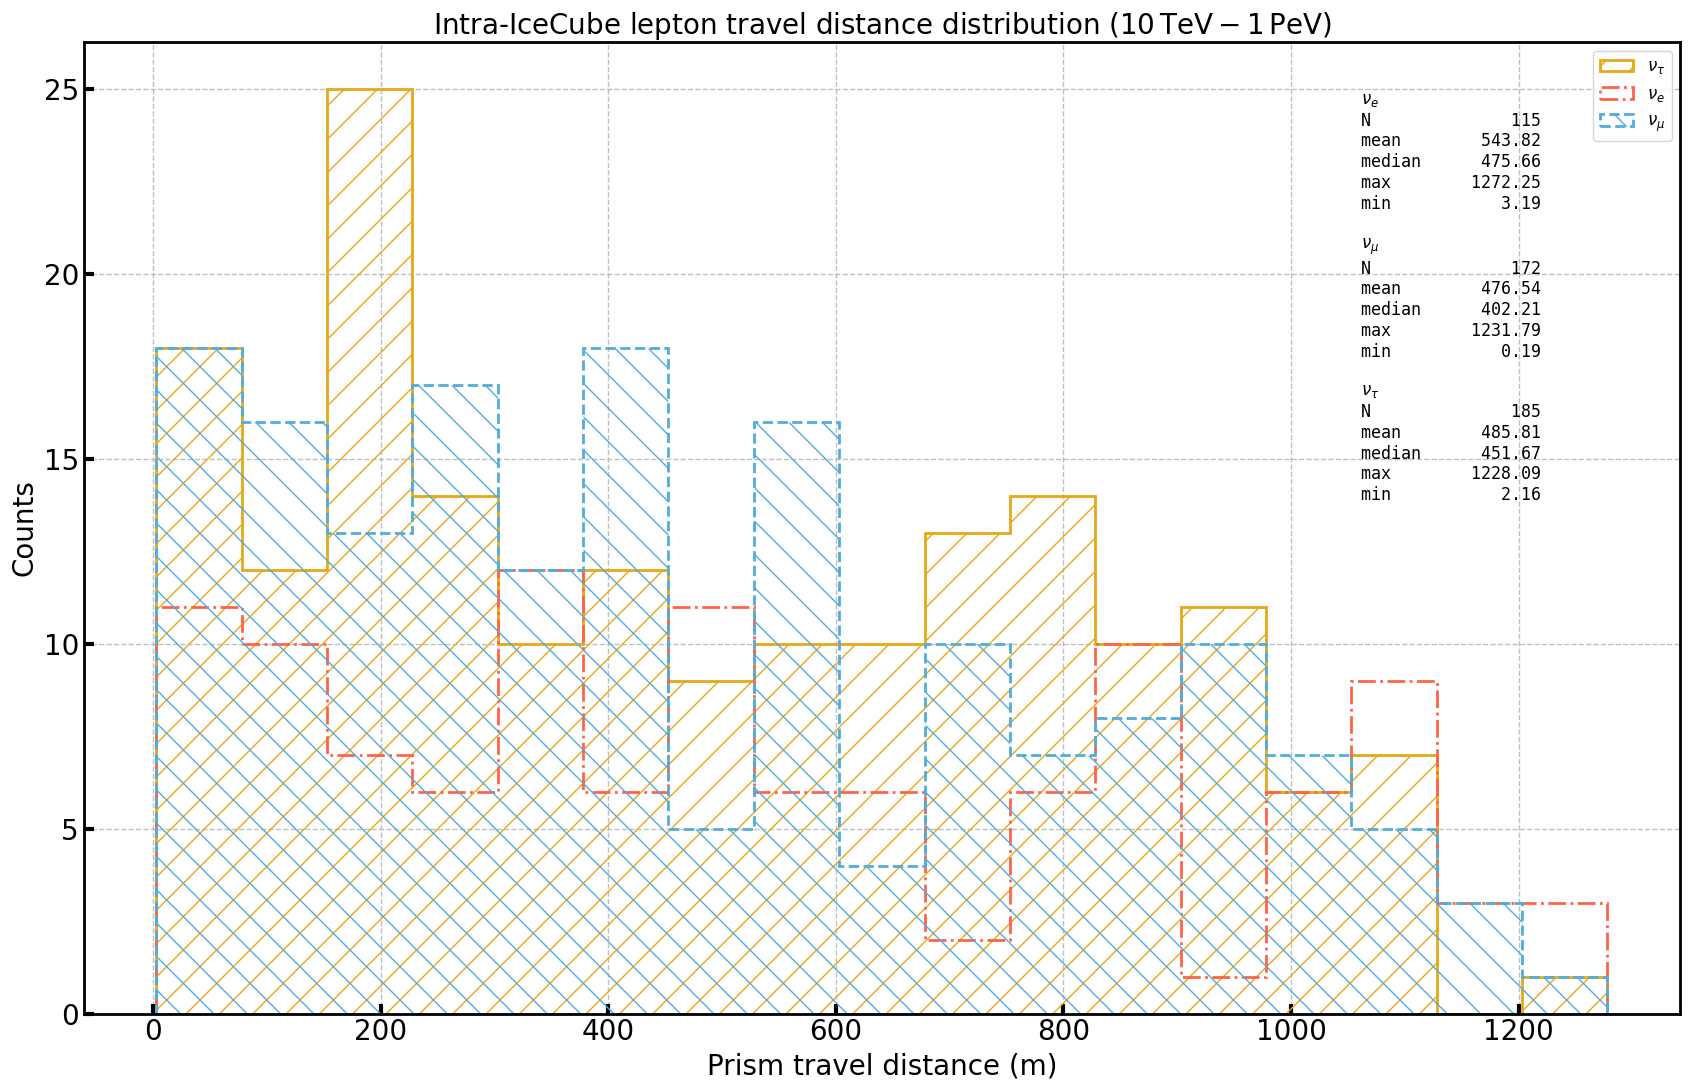

In [102]:
N = 1000
plot_prism_travel_distance_distrubution(df_e=df_TeV_nu_mu_1_truth[:N],
                                        df_mu=df_TeV_nu_e_1_truth[:N],
                                        df_tau=df_TeV_nu_tau_1_truth[:N],
                                        er=EnergyRange.ER_10_TEV_1_PEV)
